# Exercise 4: LAMMPS

In [1]:
# EXECUTE THIS CELL
! pip install lammps -q
! pip install git+https://github.com/henriasv/lammps-logfile.git


import pandas as pd
import re
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import lammps_logfile
from lammps import lammps

  Cloning https://github.com/henriasv/lammps-logfile.git to /private/var/folders/yr/cvypfzc11jsc27lfvbp3d66w0000gn/T/pip-req-build-2p6ppnpn
  Running command git clone --filter=blob:none --quiet https://github.com/henriasv/lammps-logfile.git /private/var/folders/yr/cvypfzc11jsc27lfvbp3d66w0000gn/T/pip-req-build-2p6ppnpn
  Resolved https://github.com/henriasv/lammps-logfile.git to commit d31b1fb0ae9896507c00877dfca48b05bfdc534e
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'lammps-logfile' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lammps-logfile'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for lammps-logfile: filename=lammps_logf

In this exercise, you will perform simulations using the widely adopted molecular dynamics (MD) software **LAMMPS**. For more information, visit the [LAMMPS homepage](http://lammps.sandia.gov).

> **For this task, no Python knowledge is required, but you will need to modify a few numerical values in the provided code snippets and copy and paste some cells as instructed.**

> Some simulations may take several minutes to complete. Just be patient.


## (a) Significance of the Time Step

* Begin by copying the file `Cu_mishin1.eam.alloy` into your working directory.

* Review the code snippet provided for generating the LAMMPS input file. This snippet will create a file named `input1_1.in` in your working directory. Take a moment to understand the simulation setup and parameters before executing the cell.

* The simulation uses the **microcanonical ensemble (NVE)**, in which the number of atoms (N), volume (V), and total energy (E) are conserved.

* Run the provided cell to execute the simulation.

  * If you're using a local LAMMPS installation, you’ll need to know the name of your LAMMPS executable, which may vary depending on your installation method. For example:
    
    * Serial execution: `!lmp_serial < input1_1.in > input1_1.log`
    
    * Parallel execution: `!mpirun -np 8 lmp_mpi < input3.in > input3.log`
    
    * Common LAMMPS executables include `lmp`, `lmp_serial`, `lmp_mpi`, or platform-specific names like `lmp_ubuntu`.


* After the simulation completes, examine the output. The results are saved in a log file named `input1_1.log`. You can view this file using any text editor, or directly within Google Colab or your preferred IDE.

* Locate the sections of the log file where the current time step, volume, and total energy (internal energy) are recorded.
    
    * Determine whether the volume and total energy remain constant over time.
    
    * Explain your findings in the context of the NVE ensemble and discuss why these quantities are expected to be conserved.

##### $\delta t$ = 0.001 ps = 1 fs

In [4]:
# DID NOT EXECUTE THIS CELL - DUE TO writefile COMMAND NOT WORKING IN THIS IDE - FILE MANUALLY CREATED
%%writefile input1_1.in
# Use the following units:
#   mass         g/mol
#   length       angstrom
#   time         ps
#   energy       eV
#   force        eV/angstrom
#   temperature  K
#   pressure     bar
units metal

# Use periodic boundaries in all three dimensions, i.e., no surfaces.
boundary p p p

# We use atoms as mass points. LAMMPS also supports several molecule related
# atom styles, which are mostly useful for small molecules, polymers and in
# chemistry.
atom_style atomic

# Define a crystal lattice. We are simulating copper, so we use fcc.
# The last number is the lattice constant. For now we choose an arbitrary
# value close to the literature value.
lattice fcc 3.6

# Repeat the unit cell 8 times in each direction.
region copperbox block  0 8  0 8  0 8  units lattice

# Fill the lattice with atoms of type 1. We will later define type 1
# to be copper.
create_box 1 copperbox
create_atoms 1 box

# Atom type number 1 is copper, for which we specify the mass in u.
mass 1 63.546

# Set up the description of the forces between atoms. We use a parametrized
# EAM potential, the parameters (and reference to publication) are given in
# the file Cu_mishin1.eam.alloy. This file must be in the same directory as this
# script.
pair_style eam/alloy
pair_coeff * * Cu_mishin1.eam.alloy Cu        # Atom type 1 is copper.

# Use a velocity-Verlet integrator. This is also the default for LAMMPS.
run_style verlet

# This defines the timestep delta t for the velocity-Verlet.
timestep 0.001 # ps

# This tells LAMMPS which values to output to the screen and the file
# "log.lammps".
# Step, temperature, potential energy, kinetic energy, total energy,
# pressure, volume, length in x, y, z.
thermo_style custom step temp pe ke etotal press vol lx ly lz

# Output every 100 steps.
thermo 100 

# Initialize temperature to 600 K. Here, only the kinetic energy is
# manipulated. Therefore, we assume that equipartition is applicable
# and assign a kinetic energy corresponding to 1200 K. Half of that energy
# will be converted to potential energy. You can convince yourself that this
# is correct by observing the temperature column of the output.
# The last number is a random seed, a purely technical variable controlling
# the random assignment of velocities. If you are interested, you can find
# information in the wikipedia article "pseudorandom number generator".
velocity all create 1200.0  753292

# Now we define the ensemble that we want to use. 
# Here this is NVE, the microcanonical ensemble.
fix 1 all nve

# This is the command for LAMMPS to actually run the simulation. 
# The number gives the number of steps it should run. 
# To get the corresponding time, multiply with the value for timestep.
run 50000

SyntaxError: invalid syntax (3150524998.py, line 11)

In [5]:
# EXECUTE THIS CELL
lmp = lammps(cmdargs=["-log", "input1_1.log"])
lmp.file("input1_1.in")

#! lmp_serial < input1_1.in > input1_1.log

LAMMPS (29 Aug 2024 - Update 1)
Lattice spacing in x,y,z = 3.6 3.6 3.6
Created orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  1 by 1 by 1 MPI processor grid
Created 2048 atoms
  using lattice units in orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  create_atoms CPU = 0.000 seconds
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.50679
  ghost atom cutoff = 7.50679
  binsize = 3.753395, bins = 8 8 8
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0
  Time step     : 0.001
Per MPI rank memory allocation (min/avg/max) = 3.962 | 3.962 | 3.962 Mbytes
   Step          Temp          PotEng         KinEng         TotEng         Press          Volume           

The first simulation uses a time step of $\delta t$ = 1 fs (0.001 ps) and runs for a total duration of 5 ps. 

- To explore the effect of different time steps, copy and paste the input cell as needed and repeat the simulation using time steps of $\delta t$ = 2, 5 and 10 fs. 
    - **Ensure the total simulation time remains at 5 ps**: this means you must adjust the `run` command in each input file accordingly. 
    - Don’t forget to rename both the input and output files for each case (e.g., `input1_2.*`, `input1_5.*`, `input1_10.*`) to avoid overwriting previous results.

- Once all simulations are complete, **execute the cell that plots the total energy as a function of time**. Consider the following in your analysis:
    * Is the total energy conserved in each simulation?
    * Based on your results, which time step would you choose?
    * What factors influence your choice of an appropriate time step?

##### $\delta t$ = 0.002 ps = 2 fs

In [ ]:
# Your input

In [7]:
lmp = lammps(cmdargs=["-log", "input1_2.log"])
lmp.file("input1_2.in")

LAMMPS (29 Aug 2024 - Update 1)
Total wall time: 0:28:20
Lattice spacing in x,y,z = 3.6 3.6 3.6
Created orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  1 by 1 by 1 MPI processor grid
Created 2048 atoms
  using lattice units in orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  create_atoms CPU = 0.000 seconds
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.50679
  ghost atom cutoff = 7.50679
  binsize = 3.753395, bins = 8 8 8
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0
  Time step     : 0.002
Per MPI rank memory allocation (min/avg/max) = 3.962 | 3.962 | 3.962 Mbytes
   Step          Temp          PotEng         KinEng         TotEng         Press  

##### $\delta t$ = 0.005 ps = 5 fs

In [ ]:
# Your input

In [8]:
lmp = lammps(cmdargs=["-log", "input1_5.log"])
lmp.file("input1_5.in")

LAMMPS (29 Aug 2024 - Update 1)
Total wall time: 0:00:19
Lattice spacing in x,y,z = 3.6 3.6 3.6
Created orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  1 by 1 by 1 MPI processor grid
Created 2048 atoms
  using lattice units in orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  create_atoms CPU = 0.000 seconds
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.50679
  ghost atom cutoff = 7.50679
  binsize = 3.753395, bins = 8 8 8
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0
  Time step     : 0.005
Per MPI rank memory allocation (min/avg/max) = 3.962 | 3.962 | 3.962 Mbytes
   Step          Temp          PotEng         KinEng         TotEng         Press  

##### $\delta t$ = 0.01 ps = 10 fs

In [ ]:
# Your input

In [9]:
lmp = lammps(cmdargs=["-log", "input1_10.log"])
lmp.file("input1_10.in")

LAMMPS (29 Aug 2024 - Update 1)
Total wall time: 0:00:17
Lattice spacing in x,y,z = 3.6 3.6 3.6
Created orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  1 by 1 by 1 MPI processor grid
Created 2048 atoms
  using lattice units in orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  create_atoms CPU = 0.000 seconds
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.50679
  ghost atom cutoff = 7.50679
  binsize = 3.753395, bins = 8 8 8
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0
  Time step     : 0.01
Per MPI rank memory allocation (min/avg/max) = 3.962 | 3.962 | 3.962 Mbytes
   Step          Temp          PotEng         KinEng         TotEng         Press   

#### Plotting

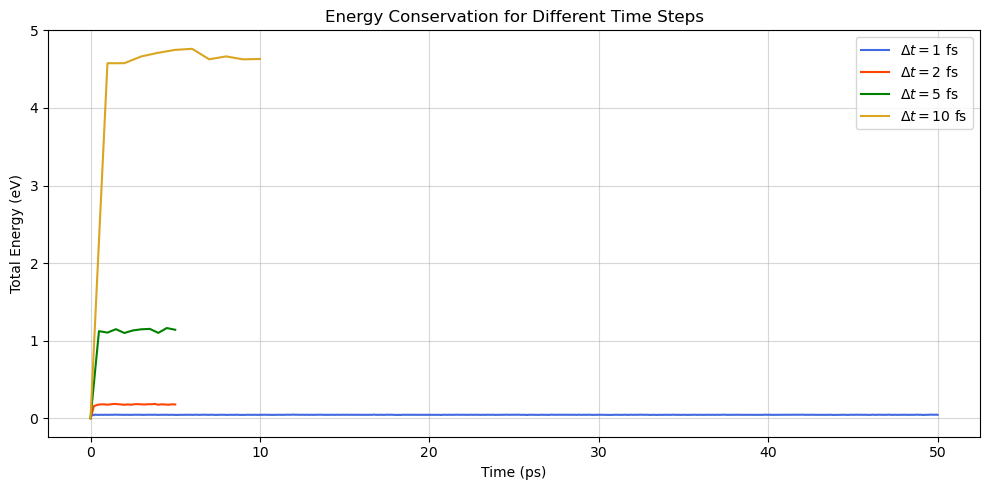

In [15]:
import matplotlib.pyplot as plt
import lammps_logfile

time_steps = [1, 2, 5, 10]  # in fs
colors = ["royalblue", "orangered", "green", "goldenrod"]

plt.figure(figsize=(10, 5))
plt.xlabel("Time (ps)")
plt.ylabel("Total Energy (eV)")
plt.title("Energy Conservation for Different Time Steps")
plt.grid(alpha=0.5)

for dt, color in zip(time_steps, colors):
    log = lammps_logfile.File(f"input1_{dt}.log")
    steps = log.get("Step")
    energy = log.get("TotEng")

    # Convert fs → ps for time axis
    time = steps * (dt * 0.001)
    energy_shifted = energy - energy[0]
    plt.plot(time, energy_shifted, label=fr"$\Delta t = {dt}$ fs", color=color)

plt.legend()
plt.tight_layout()
plt.show()


	•	1 fs (blue line): total energy fluctuation is near zero
	•	10 fs (yellow line): massive upward drift in total energy
	•	2 fs and 5 fs: mild-to-moderate energy drift
“Did 1 fs result in basically 0 energy conservation?”

No — the opposite! It resulted in perfect energy conservation.
The curve looks flat because it really is — the energy deviation is on the scale of ~0.001 eV or less, which is excellent.


1 fs
Flat line, no drift ✅
Very accurate & stable ✅


2 fs
Slight upward drift ⚠️
Acceptable, but less perfect


5 fs
Noticeable drift ❌
Too high for good MD


10 fs
Huge energy gain ❌❌
Unstable and unphysical


## (b) Lattice constant

For this part, use the file `input2.in`. Read through it carefully and note any differences compared to the previous input file. 

This simulation uses the **isothermal-isobaric ensemble (NpT)**, where the number of atoms (N), pressure (p), and temperature (T) are held constant. With the pressure set to ambient conditions, the system’s volume is allowed to fluctuate.

If you check the input script, you'll see that the simulation box contains **8 $\times$ 8 $\times$ 8 unit cells**.

Run the simulation and determine the **lattice constant at 300 K** by executing the provided cell.

In [ ]:
# EXECUTE THIS CELL
%%writefile input2.in
# Use the following units:
#   mass         g/mol
#   length       angstrom
#   time         ps
#   energy       eV
#   force        eV/angstrom
#   temperature  K
#   pressure     bar
units metal

# Use periodic boundaries in all three dimensions, i.e., no surfaces.
boundary p p p

# We use atoms as mass points. LAMMPS also supports several molecule related
# atom styles, which are mostly useful for small molecules, polymers and in
# chemistry.
atom_style atomic

# Define a crystal lattice. We are simulating copper, so we use fcc.
# The last number is the lattice constant. For now we choose an arbitrary
# value close to the literature value.
lattice fcc 3.6

# Repeat the unit cell 8 times in each direction.
region copperbox block  0 8  0 8  0 8  units lattice

# Fill the lattice with atoms of type 1. We will later define type 1
# to be copper.
create_box 1 copperbox
create_atoms 1 box

# Atom type number 1 is copper, for which we specify the mass in u.
mass 1 63.546

# Set up the description of the forces between atoms. We use a parametrized
# EAM potential, the parameters (and reference to publication) are given in
# the file Cu_mishin1.eam.alloy. This file must be in the same directory as this
# script.
pair_style eam/alloy
pair_coeff * * Cu_mishin1.eam.alloy Cu        # Atom type 1 is copper.

# Use a velocity-Verlet integrator. This is also the default for LAMMPS.
run_style verlet

# This defines the timestep delta t for the velocity-Verlet.
timestep 0.001 # ps

# This tells LAMMPS which values to output to the screen and the file
# "log.lammps".
# Step, temperature, potential energy, kinetic energy, total energy,
# pressure, volume, length in x, y, z.
thermo_style custom step temp pe ke etotal press vol lx ly lz

# Output every 100 steps.
thermo 100 

# Initialize temperature to 300 K. Here, only the kinetic energy is
# manipulated. Therefore, we assume that equipartition is applicable
# and assign a kinetic energy corresponding to 600 K. Half of that energy
# will be converted to potential energy. You can convince yourself that this
# is correct by observing the temperature column of the output.
# The last number is a random seed, a purely technical variable controlling
# the random assignment of velocities. If you are interested, you can find
# information in the wikipedia article "pseudorandom number generator".
velocity all create 600.0  91927

# Now we define the ensemble that we want to use. Here this is NPT with
# T = 300 K
# p = 1 bar
fix 1 all npt temp 300.0 300.0 0.1 iso 1.0 1.0 0.2

# This is the command for LAMMPS to actually run the simulation. The number
# gives the number of steps it should run. To get the corresponding time,
# multiply with the value for timestep.
run 10000

In [17]:
lmp = lammps(cmdargs=["-log", "input2.log"])
lmp.file("input2.in")

LAMMPS (29 Aug 2024 - Update 1)
Total wall time: 0:20:48
Lattice spacing in x,y,z = 3.6 3.6 3.6
Created orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  1 by 1 by 1 MPI processor grid
Created 2048 atoms
  using lattice units in orthogonal box = (0 0 0) to (28.8 28.8 28.8)
  create_atoms CPU = 0.000 seconds
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.50679
  ghost atom cutoff = 7.50679
  binsize = 3.753395, bins = 8 8 8
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0
  Time step     : 0.001
Per MPI rank memory allocation (min/avg/max) = 3.962 | 3.962 | 3.962 Mbytes
   Step          Temp          PotEng         KinEng         TotEng         Press  

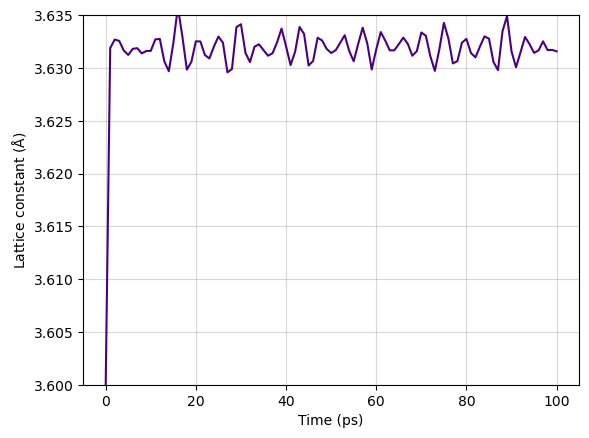

In [18]:
# EXECUTE THIS CELL
log = lammps_logfile.File(f"input2.log")
steps = log.get("Step")
l = log.get("Lx")
plt.plot(steps * dt * 0.001, l/8, color="indigo")

plt.ylim(3.6, 3.635)

plt.xlabel("Time (ps)")
plt.ylabel(r"Lattice constant ($\mathrm{\AA}$)")
plt.grid(alpha=0.5)
plt.show()

In [19]:
# EXECUTE THIS CELL
mid_index = len(l) // 2

# Take the second half of the 'l' values and divide by 8 (to convert from box length to lattice constant)
l_second_half = l[mid_index:] / 8

# Compute the average
average_lattice_constant = np.mean(l_second_half)

print(f"Average lattice constant: {average_lattice_constant:.3f} Å")

Average lattice constant: 3.632 Å


## (c) Thermal expansion

Use `input3.in` as the input file. Open it and **insert the lattice constant** you obtained from the previous step. 

> This simulation will run at **several different temperatures**, so it may take a while to complete: feel free to grab a coffee or work on something else in the meantime.

Once the simulation is complete, use the provided code snippet to **analyze the final 20% of the volume data at each temperature**. This subset is assumed to reflect equilibrium behavior. The snippet will calculate the average volume at each temperature and plot **volume $V$** as a function of **temperature $T$**.

The **volumetric thermal expansion coefficient** is defined as:

$$
\alpha_V = \frac{1}{V_0} \left( \frac{\partial V}{\partial T} \right)_p
$$

Assuming $\alpha_V$ is approximately constant over the temperature range, run the snippet that estimates its value based on your $V$ vs. $T$ results.

In [ ]:
# EXECUTE THIS CELL
%%writefile input3.in
# Use the following units:
#   mass         g/mol
#   length       angstrom
#   time         ps
#   energy       eV
#   force        eV/angstrom
#   temperature  K
#   pressure     bar
units metal

# Use periodic boundaries in all three dimensions, i.e., no surfaces.
boundary p p p

# We use atoms as mass points. LAMMPS also supports several molecule related
# atom styles, which are mostly useful for small molecules, polymers and in
# chemistry.
atom_style atomic

# Define a crystal lattice. We are simulating copper, so we use fcc.
# The last number is the lattice constant.
lattice fcc 3.632                         

# Repeat the unit cell 8 times in each direction.
region copperbox block  0 8  0 8  0 8  units lattice

# Fill the lattice with atoms of type 1. We will later define type 1
# to be copper.
create_box 1 copperbox
create_atoms 1 box

# Atom type number 1 is copper, for which we specify the mass in u.
mass 1 63.546

# Set up the description of the forces between atoms. We use a parametrized
# EAM potential, the parameters (and reference to publication) are given in
# the file Cu_mishin1.eam.alloy. This file must be in the same directory as this
# script.
pair_style eam/alloy
pair_coeff * * Cu_mishin1.eam.alloy Cu        # Atom type 1 is copper.

# Use a velocity-Verlet integrator. This is also the default for LAMMPS.
run_style verlet

# This defines the timestep delta t for the velocity-Verlet.
timestep 0.001 # ps

# This tells LAMMPS which values to output to the screen and the file
# "log.lammps".
# Step, temperature, potential energy, kinetic energy, total energy,
# pressure, volume, length in x, y, z.
thermo_style custom step temp pe ke etotal press vol lx ly lz

# Output every 100 steps.
thermo 100 

# Initialize temperature to 300 K. Here, only the kinetic energy is
# manipulated. Therefore, we assume that equipartition is applicable
# and assign a kinetic energy corresponding to 600 K. Half of that energy
# will be converted to potential energy. You can convince yourself that this
# is correct by observing the temperature column of the output.
# The last number is a random seed, a purely technical variable controlling
# the random assignment of velocities. If you are interested, you can find
# information in the wikipedia article "pseudorandom number generator".
velocity all create 600.0  91927

# Now we define the ensemble that we want to use. Here this is NPT with
# T = 300 K
# p = 1 bar
fix 1 all npt temp 300.0 300.0 0.1 iso 1.0 1.0 0.5

# This is the command for LAMMPS to actually run the simulation. The number
# gives the number of steps it should run. To get the corresponding time,
# multiply with the value for timestep.
run 5000

# Repeat at different temperatures.
fix 1 all npt temp 400.0 400.0 0.1 iso 1.0 1.0 0.5
run 5000

fix 1 all npt temp 500.0 500.0 0.1 iso 1.0 1.0 0.5
run 5000

fix 1 all npt temp 600.0 600.0 0.1 iso 1.0 1.0 0.5
run 5000

In [20]:
lmp = lammps(cmdargs=["-log", "input3.log"])
lmp.file("input3.in")

LAMMPS (29 Aug 2024 - Update 1)
Total wall time: 0:02:34
Lattice spacing in x,y,z = 3.632 3.632 3.632
Created orthogonal box = (0 0 0) to (29.056 29.056 29.056)
  1 by 1 by 1 MPI processor grid
Created 2048 atoms
  using lattice units in orthogonal box = (0 0 0) to (29.056 29.056 29.056)
  create_atoms CPU = 0.000 seconds
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.50679
  ghost atom cutoff = 7.50679
  binsize = 3.753395, bins = 8 8 8
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0
  Time step     : 0.001
Per MPI rank memory allocation (min/avg/max) = 3.962 | 3.962 | 3.962 Mbytes
   Step          Temp          PotEng         KinEng         TotE

<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
/var/folders/yr/cvypfzc11jsc27lfvbp3d66w0000gn/T/ipykernel_43219/1682991382.py:33: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Volume ($\mathrm{\AA^3}$)")


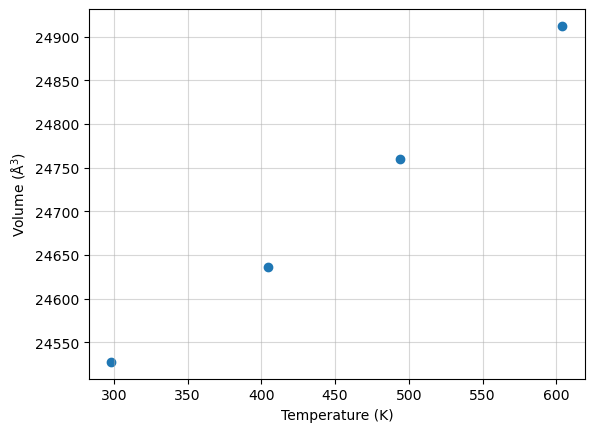

In [21]:
# EXECUTE THIS CELL
log = lammps_logfile.File("input3.log")

# Extract full temperature and volume data
temp_all = log.get("Temp")
vol_all = log.get("Volume")

# Determine number of entries per temperature block
entries_per_block = 50  # 5000 steps / 100 (thermo frequency)
num_blocks = len(temp_all) // entries_per_block

# Initialize lists for average temperature and volume
avg_temps = []
avg_vols = []

# Define the fraction of data from the end of each block to average over
fraction_to_average = 0.2
subset_size = int(entries_per_block * fraction_to_average)

for i in range(num_blocks):
    start = i * entries_per_block
    end = (i + 1) * entries_per_block
    temp_block = temp_all[start:end]
    vol_block = vol_all[start:end]
    
    # Use the last 20% of the data
    avg_temps.append(np.mean(temp_block[-subset_size:]))
    avg_vols.append(np.mean(vol_block[-subset_size:]))

# Plot Volume vs. Temperature
plt.scatter(avg_temps, avg_vols, marker='o')
plt.xlabel("Temperature (K)")
plt.ylabel("Volume ($\mathrm{\AA^3}$)")

plt.grid(alpha=0.5)
plt.show()

Intercept:				24137 Å³
Reference Volume at 300 K (V₀):		24527 Å³
Slope (dV/dT):				1.27 Å³/K
Thermal Expansion Coefficient α_V:	5.17e-05 1/K


<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
/var/folders/yr/cvypfzc11jsc27lfvbp3d66w0000gn/T/ipykernel_43219/11327835.py:31: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Volume ($\mathrm{\AA^3}$)")


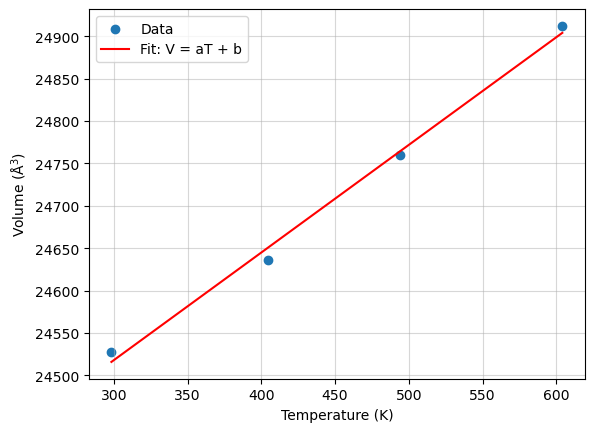

In [22]:
# EXECUTE THIS CELL
# Define a linear model: V = a*T + b
def linear_model(T, a, b):
    return a * T + b

# Fit the linear model to the average temperature and volume data
params, covariance = curve_fit(linear_model, avg_temps, avg_vols)
a, b = params  # a = dV/dT, b = intercept


a = params[0]  # dV/dT
b = params[1]  # Intercept

V_0 = avg_vols[0]  # Volume at reference temperature (e.g. 300 K)

alpha_V = a / V_0

print(f"Intercept:\t\t\t\t{b:.0f} Å³")
print(f"Reference Volume at 300 K (V₀):\t\t{V_0:.0f} Å³")
print(f"Slope (dV/dT):\t\t\t\t{a:.2f} Å³/K")
print(f"Thermal Expansion Coefficient α_V:\t{alpha_V:.2e} 1/K")


# Plot the data and the fitted curve
T_fit = np.linspace(min(avg_temps), max(avg_temps), 100)
V_fit = linear_model(T_fit, *params)

plt.scatter(avg_temps, avg_vols, marker='o', label='Data')
plt.plot(T_fit, V_fit, color='red', label='Fit: V = aT + b')
plt.xlabel("Temperature (K)")
plt.ylabel("Volume ($\mathrm{\AA^3}$)")

plt.legend()
plt.grid(alpha=0.5)
plt.show()